

# Prevendo o nível de satisfação do cliente (Santander)

#### O Problema de Negócio

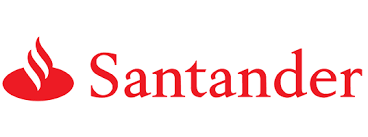

In [1]:
from IPython.display import Image
Image("Std.png")

Um desafio muito grande nos dias de hoje, é conseguir prever a satisfação do cliente. O Banco Santander solicitou ajuda ao [kaggle.com](http://kaggle.com) para identificar os clientes insatisfeitos no início do relacionamento, com isso, permitirá a tomada de decisão proativa para melhorar o serviço antes que o cliente encerre o seu vínculo.

Dataset da competição: https://www.kaggle.com/c/santander-customer-satisfaction

O objetivo é prever se o cliente **está** satisfeito **ou não** com a sua experèncua bancária.

**"TARGET"** será a variável preditiva. O valor **"0"** se refere ao cliente **satisfeito**, e **"1"** para **insatisfeito**.



In [2]:
# Importando os pacotes.
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
# Importando os arquivos.
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
# Visualizando as primeiras linhas dos dados de treino.
display(df_train.head())

# Identificando os tipos de variáveis.
df_train.dtypes.unique()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


array([dtype('int64'), dtype('float64')], dtype=object)

In [5]:
# Estatística dos dados.
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


## Análise Exploratória

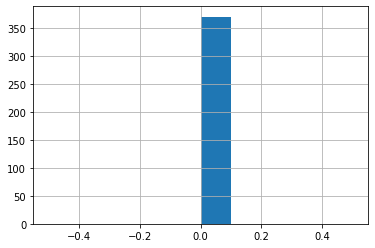

In [6]:
# Analisando valores missing.
df_train.isnull().sum().hist()
plt.show()

In [7]:
# Verificando a existência de colunas duplicadas.
df_train.columns.duplicated().sum()

0

In [8]:
# Shape dos dados de treino.
print(df_train.shape)

(76020, 371)


## Relação entre a idade e a satisfação do cliente

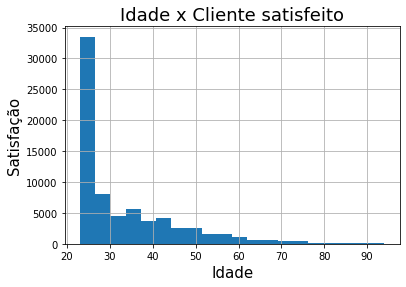

In [9]:
# Plot.
df_train[(df_train.var15 > 22) & (df_train.var15 < 95) & (df_train.TARGET == 0)].var15.hist(bins = 20)
plt.title("Idade x Cliente satisfeito", fontsize = 18)
plt.xlabel("Idade", fontsize = 15)
plt.ylabel("Satisfação", fontsize = 15)
plt.show()

Nota-se que os clientes **entre 23 e 30 anos** são os mais satisfeitos com os serviços prestados. 

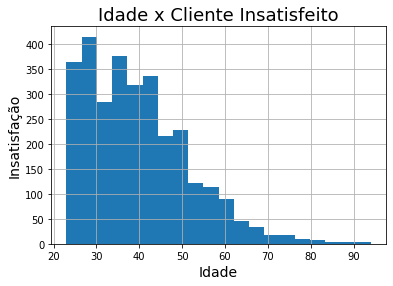

In [10]:
# Plot.
df_train[(df_train.var15 > 22) & (df_train.var15 < 95) & (df_train.TARGET == 1)].var15.hist(bins = 20)
plt.title("Idade x Cliente Insatisfeito", fontsize = 18)
plt.xlabel("Idade", fontsize = 14)
plt.ylabel("Insatisfação", fontsize = 14)
plt.show()

Neste caso, a taxa de insatisfação é bem alta na faixa etária de clientes abaixo dos **52 anos** aproximadamente.

TARGET
0    73012
1     3008
dtype: int64

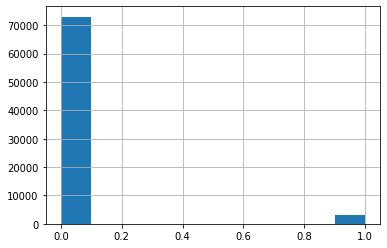

In [11]:
# Distribuição dos clientes satisfeitos e insatisfeitos nos dados de treino.
display(df_train.groupby("TARGET").size())

# Visualizando a distribuição.
df_train["TARGET"].hist()
plt.show()

Nota-se o desequilibrio da variável "Target", precisamos trabalhar para que o modelo aprenda de uma forma igual, para que o mesmo gera generalizável e não tendencioso.

### Removendo a coluna ID

Farei a remoção da coluna ID, pois a mesma não terá utilidade e caso seja usada no momento, pode influênciar negativamente no modelo.

In [12]:
# Deletando a coluna ID dos dados de treino.
df_train.drop(columns = ["ID"], inplace = True)

In [13]:
# Deletando a coluna ID dos dados de teste.
id_test = df_test["ID"]
df_test.drop(columns = ["ID"], inplace = True)

### Balanceando os dados

Nossa variável Target se encontra totalmente desequilibrada. Precisamos balanceá-la para que o modelo
aprenda de forma correta para que façamos as previsões que desejamos.

A superamostragem será utilizada com o SMOTE, pois ele cria novos exemplos de treinamento (artificial) com base nos 
exemplos de treinamento original. Se o SMOTE vê dois exemplos da mesma classe próximos um do outro, ele cria um terceiro
exemplo batendo no meio dos dois originais, isso o faz muito poderoso.

In [14]:
# Importando o pacote para balancear os dados de treino.
from imblearn.over_sampling import SMOTE

In [15]:
# Separando os dados.
dfValues = df_train
dfTarget = df_train.TARGET

In [16]:
# Removendo a variável target de dfValues.
dfValues.drop(columns="TARGET", inplace = True)

In [17]:
# Aplicando o balanceamento.
oversample = SMOTE()
X, Y = oversample.fit_resample(dfValues, dfTarget)

In [18]:
# Reshape dos dados balanceados.
print(X.shape)
print(Y.shape)

(146024, 369)
(146024,)


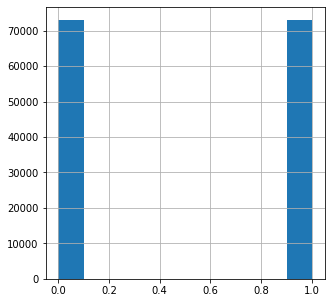

In [19]:
# Variável TARGET balanceada.
Y.hist(figsize = (5,5))
plt.show()

Após o balanceamento, o dataset está pronto para ser apresentado ao modelo de forma igual.

### Normalização dos dados de treino

Normalização se refere a ajustar a escala de cada observação (linha) de modo que ela tenha comprimento igual a 1 (chamado vetor de comprimento 1 em álgebra linear). Este método de pré-processamento é útil quando temos datasets esparsos (com muitos zeros) e atributos com escala muito variada.

In [20]:
# Carregando o pacote.
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Normalizando os dados de treino.
scale = MinMaxScaler(feature_range = (0, 1))
trainNorm = scale.fit_transform(X)

In [22]:
# Convertendo o array resultante para um dataframe.
trainNorm = pd.DataFrame(trainNorm)

In [23]:
# Comparando os dados de treino.
print("\nNão normalizados: \n\n:", X.values[0:3,:])
print("\nNormalizados: \n\n", trainNorm.values[0:3,:])


Não normalizados: 

: [[2.000000e+00 2.300000e+01 0.000000e+00 ... 0.000000e+00 0.000000e+00
  3.920517e+04]
 [2.000000e+00 3.400000e+01 0.000000e+00 ... 0.000000e+00 0.000000e+00
  4.927803e+04]
 [2.000000e+00 2.300000e+01 0.000000e+00 ... 0.000000e+00 0.000000e+00
  6.733377e+04]]

Normalizados: 

 [[0.99976406 0.18       0.         ... 0.         0.         0.00154526]
 [0.99976406 0.29       0.         ... 0.         0.         0.0020025 ]
 [0.99976406 0.18       0.         ... 0.         0.         0.00282212]]


### Normalização dos dados de teste

In [24]:
# Normalizando os dados de teste.
testNorm = scale.fit_transform(df_test)

In [25]:
# Convertendo o array resultante para um dataframe.
testNorm = pd.DataFrame(testNorm)

In [26]:
# Comparando os dados de teste.
print("\nNão normalizados: \n\n:", df_test.values[0:3,:])
print("\nNormalizados: \n\n", testNorm.values[0:3,:])


Não normalizados: 

: [[2.000000e+00 3.200000e+01 0.000000e+00 ... 0.000000e+00 0.000000e+00
  4.053210e+04]
 [2.000000e+00 3.500000e+01 0.000000e+00 ... 0.000000e+00 0.000000e+00
  4.548672e+04]
 [2.000000e+00 2.300000e+01 0.000000e+00 ... 0.000000e+00 0.000000e+00
  4.699395e+04]]

Normalizados: 

 [[0.99976406 0.27       0.         ... 0.         0.         0.0013612 ]
 [0.99976406 0.3        0.         ... 0.         0.         0.00153268]
 [0.99976406 0.18       0.         ... 0.         0.         0.00158484]]


### PCA - Redução de Dimensionalidade

A aplicação do PCA é um metodo para extração das variáveis importantes (na forma de componentes) a partir de um grande conjunto de variáveis. Permite extrair um número pequeno de conjuntos dimensionais a partir de um dataset altamente dimensional. Com menos variáveis, a visualização também se torna muito mais significativa. Usarei o PCA para selecionar 50 componentes (grupo de variáveis) principais.

Cada componente resultante é uma combinação linear de n atributos. Ou seja, cada componente principal é uma combinação de atributos presentes no dataset.

In [27]:
# Carregando o pacote.
from sklearn.decomposition import PCA

In [28]:
# Separando os dados.
x_train = trainNorm
y_train = Y 

In [29]:
# Selecionando os componentes.
pca = PCA(n_components = 50)

In [30]:
# Reduzindo os dados de treino.
train_pca = pca.fit_transform(x_train)

In [31]:
# Variancia de cada componente.
print("Variancia de cada componente:", pca.explained_variance_ratio_)

Variancia de cada componente: [0.34932795 0.16441109 0.12510635 0.06633076 0.05615779 0.04423562
 0.03207156 0.02367082 0.0185448  0.01212245 0.01001574 0.00971443
 0.00769259 0.00735515 0.00720425 0.00562704 0.00539453 0.00500168
 0.00428241 0.00372238 0.00304732 0.00294117 0.00279427 0.00267814
 0.002601   0.00199805 0.00167951 0.00148187 0.00133566 0.00123607
 0.00121237 0.00111257 0.00106555 0.00089688 0.0008742  0.0007829
 0.00068669 0.00061942 0.00058121 0.00056108 0.00055238 0.00053481
 0.00051366 0.00049474 0.00049134 0.0004403  0.00039677 0.00036979
 0.0003635  0.00035464]


In [32]:
# Verificando a variabilidade total dos componentes.
print("\n Total da variância:", round(sum(list(pca.explained_variance_ratio_))*100, 2))


 Total da variância: 99.27


In [33]:
# Dados de treino após a redução.
train_pca.shape

(146024, 50)

In [34]:
# Aplicando a redução nos dados de teste.
test_pca = pca.fit_transform(df_test)

In [35]:
# Dados de teste após a redução.
test_pca.shape

(75818, 50)

# XGBoost - (Modelo v1)

 A principal vantagem do XGBoost sobre o GBM é sua capacidade de gerenciar dados esparsos. O XGBoost automaticamente aceita dados esparsos como input sem armazenar zeros na memória. Basicamente o XGBoost utiliza os mesmos parâmetros do GBM e permite tratamento avançado de dados missing.

In [36]:
# Importando os pacotes.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [37]:
# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(train_pca, Y, test_size = 0.30, random_state = 0)

In [38]:
# Instânciando o modelo.
modelo1 = XGBClassifier()

In [39]:
# Treinando o modelo v1.
modelo1.fit(X_treino, y_treino)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [40]:
# Fazendo as previsões e gerando a confusion matrix.
y_pred = modelo1.predict(X_teste)
matrix = confusion_matrix(y_teste, y_pred)

In [41]:
# Visualizando a matrix
print(matrix)

[[19160  2616]
 [ 2079 19953]]


In [42]:
# Fazendo a avaliação com os dados de treino.
accuracy = accuracy_score(y_teste, y_pred)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 89.28%


# Suport Vector Machines - (Modelo v2)

O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte.

In [43]:
# Carregando os pocotes.
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [44]:
# Número de folds.
folds = 10

In [45]:
# Separando os dados em folds.
kfold = KFold(folds, True, random_state = 5)

In [46]:
# Instânciando o modelo.
modelo2 = SVC()

In [47]:
# Treinando o modelo v2.
modelo2.fit(X_treino, y_treino)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
# Fazendo as previsões e gerando a confusion matrix.
y_pred2 = modelo2.predict(X_teste)
matrix2 = confusion_matrix(y_teste, y_pred2)

In [49]:
# Visualizando a matrix
print(matrix2)

[[18898  2878]
 [ 3850 18182]]


In [50]:
# Fazendo a avaliação com os dados de treino.
accuracy2 = accuracy_score(y_teste, y_pred2)
print("Acurácia: %.2f%%" % (accuracy2 * 100.0))

Acurácia: 84.64%


# CART -  (Modelo v3)

O algoritmo constrói uma árvore binária a partir do dataset de treino. Cada atributo e cada valor de cada atributo são avaliados com o objetivo de reduzir a função de custo (Cost Function).

In [51]:
# Importando o pacote.
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Definido e separando os dados em folds.
num_folds = 10
kfold = KFold(num_folds, True, random_state = 42)

In [53]:
# Instânciando o modelo.
modelo3 = DecisionTreeClassifier()

In [54]:
# Treinando o modelo v3.
modelo3.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
# Fazendo as previsões e gerando a confusion matrix.
y_pred3 = modelo3.predict(X_teste)
matrix3 = confusion_matrix(y_teste, y_pred3)

In [56]:
# Visualizando a matrix
print(matrix3)

[[19030  2746]
 [ 2150 19882]]


In [57]:
# Fazendo a avaliação com os dados de treino.
accuracy3 = accuracy_score(y_teste, y_pred3)
print("Acurácia: %.2f%%" % (accuracy3 * 100.0))

Acurácia: 88.82%


### Visualizando os resultados dos modelos

In [58]:
print("Acurácia XGBoost: %.1f%%" % (accuracy * 100.0))
print("Acurácia SVM: %.1f%%" % (accuracy2 * 100.0))
print("Acurácia CART: %.1f%%" % (accuracy3 * 100.0))

Acurácia XGBoost: 89.3%
Acurácia SVM: 84.6%
Acurácia CART: 88.8%


O modelo **XGBoost** será o escolhido para fazer as previsões.

In [59]:
# Previsão com os dados de teste.
submiss = modelo1.predict(test_pca)

In [60]:
# Gerando os dados de submissão e utilizando a coluna ID dos dados de teste.
submission = pd.DataFrame({
    "ID": id_test,
    "Target": submiss
})

In [61]:
# Visualizando as previsões.
submission.head()

,ID,Target
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [62]:
# Salvando os resultados em um CSV.
submission.to_csv("Santander_predict.csv", index = False)

# Conclusão

O dataset por ser oculto, contém inumeras colunas e não conter um dicionário de dados, dificutou bastante o entendimento das varíaveis e dos dados em si. Muitas informações foram obtidas por outros membros da competição, no que colaborou para o entendimento.

Foram testados **3 modelos diferentes**, os dados foram tratados, normalizados e equilibrados, para que o modelo aplicado pudesse dar o melhor resultado possível.

A melhor acurácia foi com o modelo **XGBOOST**, na qual obteve uma média de **89%** de acurácia. Logo o modelo conseguirá prever com essa acurácia o potencial de satisfação do cliente.